# 1. Load Data

In [34]:
import pandas as pd
# Load training and testing datasets
train_data = pd.read_csv("../../DataCollection/Data/cleaned_train.csv")
test_data = pd.read_csv("../../DataCollection/Data/cleaned_test.csv")

# Display first few rows to confirm data loading
print("Training Data:")
print(train_data.head())
print("\nTesting Data:")
print(test_data.head())

Training Data:
   month  year         town  town_LE  town_YISHUN  town_WOODLANDS  \
0      4  2021   ANG MO KIO        0        False           False   
1      6  2021  BUKIT MERAH        4        False           False   
2      7  2023    SEMBAWANG       19        False           False   
3      8  2021    WOODLANDS       24        False            True   
4      3  2018       YISHUN       25         True           False   

   town_TOA PAYOH  town_TAMPINES  town_SERANGOON  town_SENGKANG  ...  \
0           False          False           False          False  ...   
1           False          False           False          False  ...   
2           False          False           False          False  ...   
3           False          False           False          False  ...   
4           False          False           False          False  ...   

   Secondary_within_1km  Secondary_nearest  JuniorCollege_within_1km  \
0                     1           0.843434                       

In [35]:
# Define the columns to use for training (based on the provided list)
tree_model_columns = [
    "month", "year",
    "town_LE", "flat_type_LE", "storey_range_LE", "price_per_sqm",
    "flat_model_LE", "lease_commence_date", "lease_age", "remaining_lease",
    "Latitude", "Longitude",
    "LTAMRTStation_within_1km", "LTAMRTStation_nearest",
    "MallCoordinates_within_1km", "MallCoordinates_nearest",
    "Hawker_within_1km", "Hawker_nearest",
    "PreSchool_within_1km", "PreSchool_nearest",
    "Primary_within_1km", "Primary_nearest",
    "Secondary_within_1km", "Secondary_nearest",
    "JuniorCollege_within_1km", "JuniorCollege_nearest",
    "MixedLevel_within_1km", "MixedLevel_nearest",
    "NParks_within_1km", "NParks_nearest",
    "Sports_within_1km", "Sports_nearest"
]

# Filter the train and test datasets to include only these columns
X_train = train_data[tree_model_columns]
X_test = test_data[tree_model_columns]


# 2. Encoding Categorical Features

In [36]:
# Separate features and target for training
y_train = train_data["resale_price"]

# Separate features and target for testing
y_test = test_data["resale_price"]

In [37]:
X_train.info()
X_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339629 entries, 0 to 339628
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   month                       339629 non-null  int64  
 1   year                        339629 non-null  int64  
 2   town_LE                     339629 non-null  int64  
 3   flat_type_LE                339629 non-null  int64  
 4   storey_range_LE             339629 non-null  int64  
 5   price_per_sqm               339629 non-null  float64
 6   flat_model_LE               339629 non-null  int64  
 7   lease_commence_date         339629 non-null  int64  
 8   lease_age                   339629 non-null  int64  
 9   remaining_lease             339629 non-null  float64
 10  Latitude                    339629 non-null  float64
 11  Longitude                   339629 non-null  float64
 12  LTAMRTStation_within_1km    339629 non-null  int64  
 13  LTAMRTStation_

,month,year,town_LE,flat_type_LE,storey_range_LE,price_per_sqm,flat_model_LE,lease_commence_date,lease_age,remaining_lease,...,Secondary_within_1km,Secondary_nearest,JuniorCollege_within_1km,JuniorCollege_nearest,MixedLevel_within_1km,MixedLevel_nearest,NParks_within_1km,NParks_nearest,Sports_within_1km,Sports_nearest
count,339629.000000,339629.000000,339629.000000,339629.000000,339629.000000,339629.000000,339629.000000,339629.000000,339629.000000,339629.000000,...,339629.000000,339629.000000,339629.000000,339629.000000,339629.000000,339629.000000,339629.000000,339629.000000,339629.000000,339629.000000
mean,6.596471,2020.918346,14.114955,3.045514,3.593559,5678.055776,8.620665,2000.655857,24.344143,78.771410,...,1.880246,1.316919,0.097780,3.926197,0.100115,4.421833,6.423330,1.102019,0.453068,2.091132
std,3.408541,2.262741,7.745231,0.863249,2.300746,1752.979722,3.425589,15.661668,15.661668,15.481360,...,1.167512,19.357669,0.303053,19.466427,0.311703,19.423022,4.443437,19.323160,0.622772,19.370545
min,1.000000,2017.000000,0.000000,0.000000,1.000000,2089.552239,0.000000,1966.000000,4.000000,40.000000,...,0.000000,0.017460,0.000000,0.063820,0.000000,0.100009,0.000000,0.004750,0.000000,0.022661
25%,4.000000,2019.000000,8.000000,2.000000,2.000000,4456.521739,5.000000,1985.000000,9.000000,64.333333,...,1.000000,0.320836,0.000000,1.774896,0.000000,1.859851,3.000000,0.140044,0.000000,0.783007
50%,7.000000,2021.000000,16.000000,3.000000,3.000000,5304.878049,8.000000,2002.000000,23.000000,81.333333,...,2.000000,0.508944,0.000000,3.121785,0.000000,3.686618,5.000000,0.295569,0.000000,1.211810
75%,9.000000,2023.000000,20.000000,4.000000,5.000000,6438.356164,12.000000,2016.000000,40.000000,94.166667,...,3.000000,0.790321,0.000000,4.304536,0.000000,5.291763,8.000000,0.535335,1.000000,1.783107
max,12.000000,2025.000000,25.000000,6.000000,17.000000,15591.397849,20.000000,2021.000000,59.000000,97.583333,...,6.000000,675.527969,2.000000,679.374290,2.000000,677.640827,24.000000,673.794664,3.000000,676.305515


In [38]:
X_test.info()
X_test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84908 entries, 0 to 84907
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   month                       84908 non-null  int64  
 1   year                        84908 non-null  int64  
 2   town_LE                     84908 non-null  int64  
 3   flat_type_LE                84908 non-null  int64  
 4   storey_range_LE             84908 non-null  int64  
 5   price_per_sqm               84908 non-null  float64
 6   flat_model_LE               84908 non-null  int64  
 7   lease_commence_date         84908 non-null  int64  
 8   lease_age                   84908 non-null  int64  
 9   remaining_lease             84908 non-null  float64
 10  Latitude                    84908 non-null  float64
 11  Longitude                   84908 non-null  float64
 12  LTAMRTStation_within_1km    84908 non-null  int64  
 13  LTAMRTStation_nearest       849

,month,year,town_LE,flat_type_LE,storey_range_LE,price_per_sqm,flat_model_LE,lease_commence_date,lease_age,remaining_lease,...,Secondary_within_1km,Secondary_nearest,JuniorCollege_within_1km,JuniorCollege_nearest,MixedLevel_within_1km,MixedLevel_nearest,NParks_within_1km,NParks_nearest,Sports_within_1km,Sports_nearest
count,84908.000000,84908.000000,84908.000000,84908.000000,84908.000000,84908.000000,84908.000000,84908.000000,84908.000000,84908.000000,...,84908.00000,84908.000000,84908.000000,84908.000000,84908.000000,84908.000000,84908.000000,84908.000000,84908.000000,84908.000000
mean,6.594302,2020.922222,14.114453,3.047039,3.598412,5678.665602,8.604772,2000.584998,24.415002,78.695424,...,1.87934,1.399358,0.096163,4.000654,0.099213,4.511996,6.433045,1.185758,0.457848,2.172445
std,3.413581,2.259623,7.759918,0.867153,2.302954,1754.043246,3.427050,15.621105,15.621105,15.454390,...,1.16648,20.339942,0.300710,20.447368,0.311264,20.397526,4.453862,20.303330,0.624956,20.352708
min,1.000000,2017.000000,0.000000,0.000000,1.000000,2207.792208,0.000000,1966.000000,4.000000,41.000000,...,0.00000,0.017460,0.000000,0.063820,0.000000,0.100009,0.000000,0.004750,0.000000,0.022661
25%,4.000000,2019.000000,8.000000,2.000000,2.000000,4453.496126,5.000000,1985.000000,9.000000,64.333333,...,1.00000,0.317819,0.000000,1.770620,0.000000,1.874021,3.000000,0.140182,0.000000,0.781272
50%,7.000000,2021.000000,16.000000,3.000000,3.000000,5304.347826,8.000000,2002.000000,23.000000,81.000000,...,2.00000,0.508182,0.000000,3.119786,0.000000,3.706798,5.000000,0.297172,0.000000,1.210074
75%,9.000000,2023.000000,20.000000,4.000000,5.000000,6442.477876,12.000000,2016.000000,40.000000,94.166667,...,3.00000,0.790321,0.000000,4.297095,0.000000,5.292247,8.000000,0.533942,1.000000,1.782740
max,12.000000,2025.000000,25.000000,6.000000,17.000000,15170.838710,20.000000,2021.000000,59.000000,97.750000,...,6.00000,675.527969,2.000000,679.374290,2.000000,677.640827,24.000000,673.794664,3.000000,676.305515


# 3. Data Visualisation

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

3.1 Correlation Heatmap

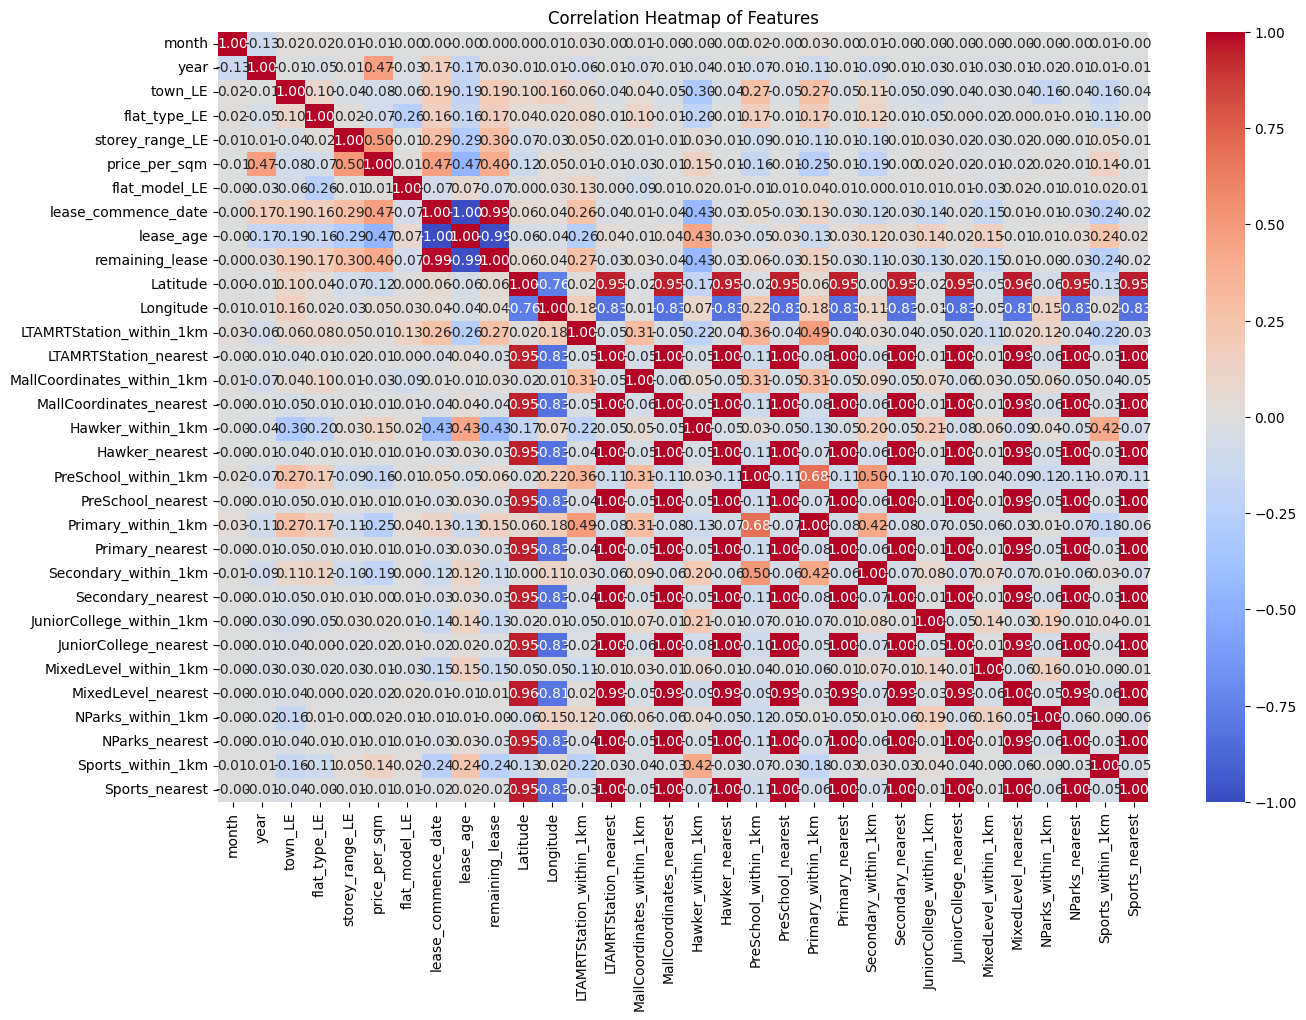

In [40]:
# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(X_train.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

3.2 Distribution Of Price Per Square Meter

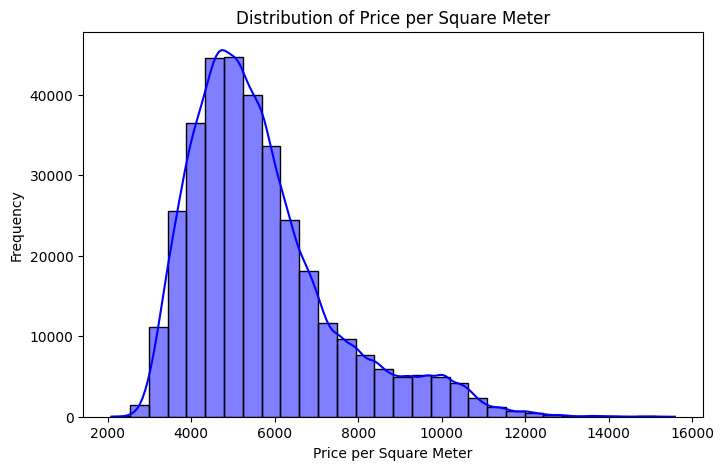

In [41]:
# Distribution of price_per_sqm
plt.figure(figsize=(8, 5))
sns.histplot(X_train["price_per_sqm"], kde=True, bins=30, color="blue")
plt.title("Distribution of Price per Square Meter")
plt.xlabel("Price per Square Meter")
plt.ylabel("Frequency")
plt.show()

3.3 Price Per Square Meter by Town

C:\Users\Admin\AppData\Local\Temp\ipykernel_22548\2914505917.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=X_train, x="town_LE", y="price_per_sqm", palette="Set3")


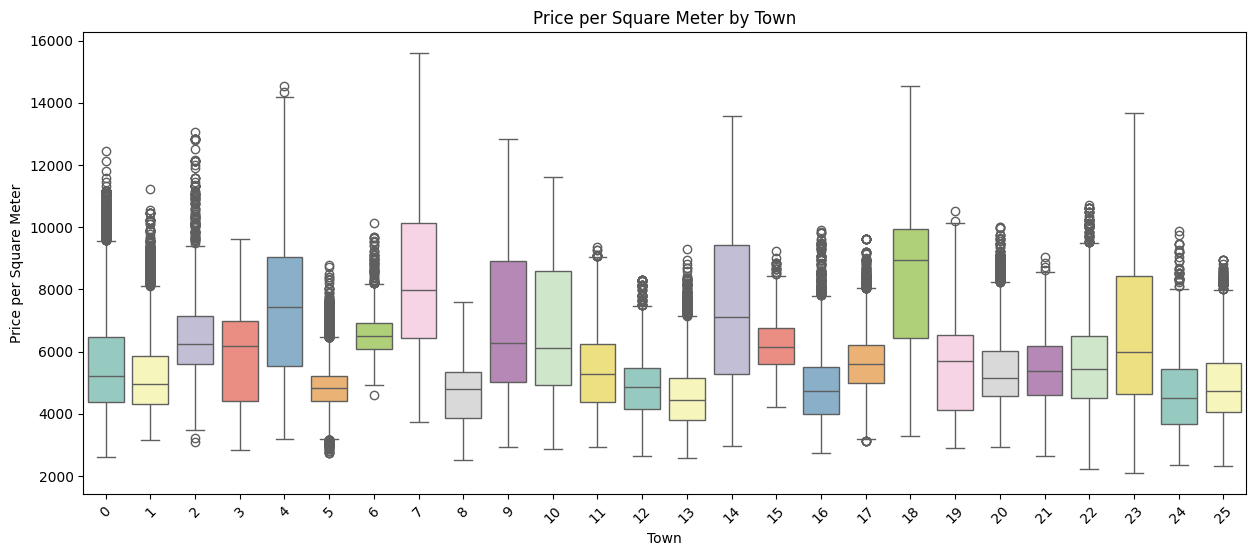

In [42]:
# Boxplot of price_per_sqm by town_LE
plt.figure(figsize=(15, 6))
sns.boxplot(data=X_train, x="town_LE", y="price_per_sqm", palette="Set3")
plt.title("Price per Square Meter by Town")
plt.xlabel("Town")
plt.ylabel("Price per Square Meter")
plt.xticks(rotation=45)
plt.show()

3.4 Geographical Distribution of Prices

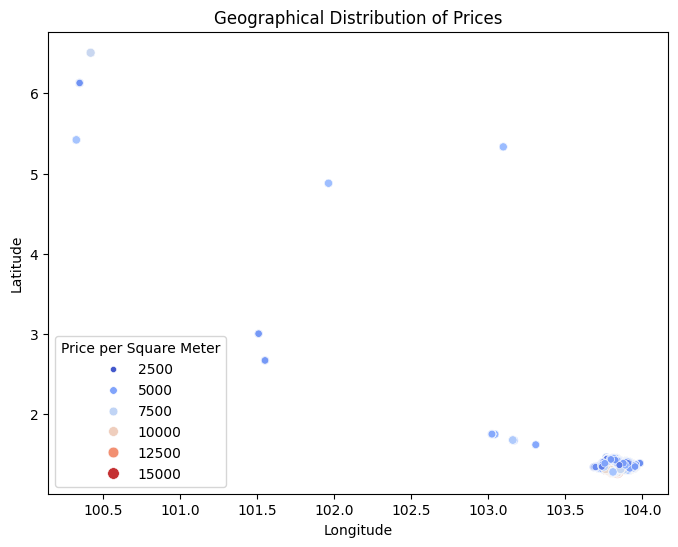

In [43]:
# Latitude and Longitude scatter plot (to observe location clustering)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=X_train, x="Longitude", y="Latitude", hue="price_per_sqm", palette="coolwarm", size="price_per_sqm")
plt.title("Geographical Distribution of Prices")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Price per Square Meter")
plt.show()

# 4. Model Training

This should take roughly 13-14 minutes to execute (Google Colab), takes 5 minutes on local device.


In [44]:
from sklearn.ensemble import RandomForestRegressor
# Train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [45]:
# Make predictions
y_pred = rf_regressor.predict(X_test)
print(y_pred)

[277020.   888000.   757800.   ... 460668.88 248530.   531528.88]


4.1 Evaluate Model

In [47]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

# mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# mean square error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# root mean squared error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# R^2 Score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2:.2f}")

# mean absolute percentage error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 3158.19
Mean Squared Error (MSE): 88339150.21
Root Mean Squared Error (RMSE): 9398.89
R^2 Score: 1.00
Mean Absolute Percentage Error (MAPE): 0.64%


# 5. Save the Model

In [48]:
import joblib

# Save the trained Random Forest Regressor model to a file
joblib.dump(rf_regressor, "rf_regressor_model.pkl")

print("Model saved as rf_regressor_model.pkl")

Model saved as rf_regressor_model.pkl


# 6. HyperParameter Tuning 1 : For Balanced Setup

In [ ]:
rf_regressor = RandomForestRegressor(
    n_estimators=500,         # More trees for better predictions
    max_depth=None,           # Let trees grow fully to capture complexity
    min_samples_split=2,      # Allow fine-grained splits
    min_samples_leaf=1,       # Leaves can represent individual data points
    max_features='sqrt',      # Use sqrt features for splits
    random_state=42           # Reproducibility
)

# Fit the regressor to your training data
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=500, random_state=42)

In [53]:
y_pred = rf_regressor.predict(X_test)
print(y_pred)

[275662.104 888000.    757125.552 ... 477946.76  248073.    534170.   ]


In [55]:
# mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# mean square error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# root mean squared error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# R^2 Score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2:.2f}")

# mean absolute percentage error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 4839.69
Mean Squared Error (MSE): 138744287.29
Root Mean Squared Error (RMSE): 11778.98
R^2 Score: 1.00
Mean Absolute Percentage Error (MAPE): 1.00%


# 7. HyperParameter Tuning 2 : For Complex Relationships


In [56]:
rf_regressor = RandomForestRegressor(
    n_estimators=200,         # Higher number of trees for better stability
    max_depth=20,             # Prevent overfitting by limiting tree depth
    min_samples_split=5,      # Avoid overly deep splits
    min_samples_leaf=5,       # Ensure leaves have sufficient samples
    max_features='sqrt',      # Reduce correlation between trees
    random_state=42           # Reproducibility
)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=5, n_estimators=200, random_state=42)

In [57]:
y_pred = rf_regressor.predict(X_test)
print(y_pred)

[267793.43254182 882070.82590789 749225.41616375 ... 482873.20635963
 253344.34492845 519043.28772077]


In [58]:
# mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# mean square error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# root mean squared error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# R^2 Score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2:.2f}")

# mean absolute percentage error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 9841.50
Mean Squared Error (MSE): 272655333.03
Root Mean Squared Error (RMSE): 16512.28
R^2 Score: 0.99
Mean Absolute Percentage Error (MAPE): 2.03%
